### This code calculates the distance of the center of geometry of the phenolic rings of the interacting tyrosines at the H4-H2B interface. It also calculates the angle between the planes of the two phenolic rings of the tyrosine residues. The distance of center of geometry and angle between the phenolic rings of H2BY83 and H4Y88 in the wild-type, H2BE76K and H4R92T systems. 

In [1]:
import MDAnalysis as mda
import numpy as np
import pandas as pd
import math
import pyblock
import matplotlib.pyplot as plt
from MDAnalysis.analysis import distances
import seaborn as sns
from numpy.linalg import norm

#Create Universes for all systems
top1= '/home/augustine/Nucleosome_system/1kx5/1kx5_2.4M/dry_1kx5_2M_OPC_trial3.prmtop'
traj1='/home/augustine/Nucleosome_system/1kx5/1kx5_2.4M/dry_1kx5_2.4M_6us.xtc'
u1 = mda.Universe(top1, traj1)

topology_E76K= '/home/augustine/Nucleosome_system/E76K/E76K_24M/dry_1kx5_2M_E76K_OPC.prmtop'
trajectory_E76K='/home/augustine/Nucleosome_system/E76K/E76K_24M/dry_1KX5_E76K_6000ns.xtc'
u2 = mda.Universe(topology_E76K, trajectory_E76K)

topology_R92T= '/home/augustine/Nucleosome_system/R92T/R92T_1/R92T_2.4M/dry_R92T_24M_OPC.prmtop'
trajectory_R92T='/home/augustine/Nucleosome_system/R92T/R92T_1/R92T_2.4M/dry_R92T_24M_6us.xtc'
u3 = mda.Universe(topology_R92T, trajectory_R92T)
#2.4M Analysis

/home/augustine/miniconda3/envs/mdaenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Wild-Type system at 2.4 M

In [2]:
## Distance and angle between the planes of H2BY83 and H4Y88##

Distance_YY = []
for ts in u1.trajectory[0:25000]:
    e=u1.select_atoms('resid 517 and name CG CD1 CD2 CE1 CE2 CZ').center_of_geometry()
    f=u1.select_atoms('resid 739 and name CG CD1 CD2 CE1 CE2 CZ').center_of_geometry()
    dist4=(norm(e - f))
    
    x0, y0, z0 =u1.select_atoms('resid 517 and name CG').center_of_geometry()
    x1, y1, z1 =u1.select_atoms('resid 517 and name CE1').center_of_geometry()
    x2, y2, z2 =u1.select_atoms('resid 517 and name CD2').center_of_geometry()
    ux, uy, uz = u = [x1-x0, y1-y0, z1-z0] #first vector
    vx, vy, vz = v = [x2-x0, y2-y0, z2-z0] #sec vector\
    u_cross_v = a, b, c= [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx] #cross product
    
    a0, b0, c0 =u1.select_atoms('resid 739 and name CG').center_of_geometry()
    a1, b1, c1 =u1.select_atoms('resid 739 and name CE1').center_of_geometry()
    a2, b2, c2 =u1.select_atoms('resid 739 and name CD2').center_of_geometry()
    ua, ub, uc = u = [a1-a0, b1-b0, c1-c0] #first vector
    va, vb, vc = v = [a2-a0, b2-b0, c2-c0] #sec vector

    v_cross_v = p, r, s= [ub*vc-uc*vb, uc*va-ua*vc, ua*vb-ub*va] #cross product
    b = np. arccos(((a*p)+(b*r)+(c*s))/((math.sqrt((a**2) + (b**2) + (c**2)))*(math.sqrt((p**2) + (r**2) + (s**2)))))
    
    Distance_YY.append((ts.frame, dist4, b))
print(Distance_YY)

#Save data to csv file
DI2 = pd.DataFrame(Distance_YY)
print(DI2)
DI2.to_csv("Dist_YY_1kx5_24M_6us.csv")

[(0, 3.605692720964366, 0.14366827822871386), (1, 3.700364838870334, 0.04549935550589322), (2, 4.009563719920891, 0.40926135845599126), (3, 3.8677219552564917, 0.2285101818755804), (4, 3.714932333101921, 0.24513631464001945), (5, 3.9162380886797257, 0.10970732586942106), (6, 3.787716365800013, 0.12881357400014926), (7, 3.6772568069246674, 0.06117525931469706), (8, 3.7914819220414664, 0.16965702867071006), (9, 3.58650523974822, 0.19170479854256117), (10, 3.6849164418620695, 0.0945532102636462), (11, 3.6754311336319536, 0.2011092350383585), (12, 3.4550077691907792, 0.0923914587601497), (13, 3.70307610219042, 0.23731156956965233), (14, 3.595217963025388, 0.03272747621760732), (15, 3.3950302134182095, 0.09377060154156565), (16, 4.134530374781359, 0.40845396696238095), (17, 3.4524539837098907, 0.36053590116740175), (18, 3.6558750441171792, 0.016360292375526983), (19, 3.3625609783875325, 0.13871063566921205), (20, 3.4102487046183674, 0.20663430940757196), (21, 3.70251055594635, 0.09697271063

#### H2BE76K system at 2.4 M

In [3]:
## Distance and angle between the planes of H2BY83 and H4Y88##

Distance_YY2 = []
for ts in u2.trajectory[0:25000]:
    g=u2.select_atoms('resid 517 and name CG CD1 CD2 CE1 CE2 CZ').center_of_geometry()
    h=u2.select_atoms('resid 739 and name CG CD1 CD2 CE1 CE2 CZ').center_of_geometry()
    dist5=(norm(g - h))
    
    x0, y0, z0 =u2.select_atoms('resid 517 and name CG').center_of_geometry()
    x1, y1, z1 =u2.select_atoms('resid 517 and name CE1').center_of_geometry()
    x2, y2, z2 =u2.select_atoms('resid 517 and name CD2').center_of_geometry()
    ux, uy, uz = u = [x1-x0, y1-y0, z1-z0] #first vector
    vx, vy, vz = v = [x2-x0, y2-y0, z2-z0] #sec vector\
    u_cross_v = a, b, c= [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx] #cross product
    
    a0, b0, c0 =u2.select_atoms('resid 739 and name CG').center_of_geometry()
    a1, b1, c1 =u2.select_atoms('resid 739 and name CE1').center_of_geometry()
    a2, b2, c2 =u2.select_atoms('resid 739 and name CD2').center_of_geometry()
    ua, ub, uc = u = [a1-a0, b1-b0, c1-c0] #first vector
    va, vb, vc = v = [a2-a0, b2-b0, c2-c0] #sec vector

    v_cross_v = p, r, s= [ub*vc-uc*vb, uc*va-ua*vc, ua*vb-ub*va] #cross product
    b = np. arccos(((a*p)+(b*r)+(c*s))/((math.sqrt((a**2) + (b**2) + (c**2)))*(math.sqrt((p**2) + (r**2) + (s**2)))))
    
    Distance_YY2.append((ts.frame, dist5, b))
print(Distance_YY2)

#Save data to csv file
DI3 = pd.DataFrame(Distance_YY2)
print(DI3)
DI3.to_csv("Dist_YY_E76K_24M_6us.csv")

[(0, 3.8520453577483984, 2.743454998338475), (1, 3.422797518891977, 3.007655975565379), (2, 3.4496653381306848, 2.9034494125309678), (3, 3.6473604129826436, 3.0578989569123243), (4, 3.5845862916070796, 2.988808075966024), (5, 3.410427629863061, 3.0220162133904576), (6, 4.055508442111239, 2.74110557515249), (7, 3.438166189615483, 2.9904245849790243), (8, 3.5276086341803516, 2.8522043319009134), (9, 3.5494157899659045, 3.0574537823220433), (10, 3.605779069704846, 3.0454583652358256), (11, 3.684623285088795, 3.086701902349829), (12, 3.6922211479750624, 2.9409045643431915), (13, 3.6616385833040743, 2.8758178104929697), (14, 3.63040772008678, 2.796469786978907), (15, 3.465485361421465, 3.00869466583598), (16, 3.455294540962411, 2.906623561811208), (17, 3.4104091273613433, 2.933408577165274), (18, 3.7637052057120797, 3.060252356842649), (19, 3.4753225831265846, 2.9451086923638603), (20, 3.4596036353725625, 2.9012612864064335), (21, 3.543307777210278, 2.98198994195716), (22, 3.655418152367979

#### H4R92T system at 2.4 M

In [4]:
## Distance and angle between the planes of H2BY83 and H4Y88##

Distance_YY3 = []
for ts in u3.trajectory[0:25000]:
    g=u3.select_atoms('resid 517 and name CG CD1 CD2 CE1 CE2 CZ').center_of_geometry()
    h=u3.select_atoms('resid 739 and name CG CD1 CD2 CE1 CE2 CZ').center_of_geometry()
    dist6=(norm(g - h))
    
    x0, y0, z0 =u3.select_atoms('resid 517 and name CG').center_of_geometry()
    x1, y1, z1 =u2.select_atoms('resid 517 and name CE1').center_of_geometry()
    x2, y2, z2 =u2.select_atoms('resid 517 and name CD2').center_of_geometry()
    ux, uy, uz = u = [x1-x0, y1-y0, z1-z0] #first vector
    vx, vy, vz = v = [x2-x0, y2-y0, z2-z0] #sec vector\
    u_cross_v = a, b, c= [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx] #cross product
    
    a0, b0, c0 =u2.select_atoms('resid 739 and name CG').center_of_geometry()
    a1, b1, c1 =u2.select_atoms('resid 739 and name CE1').center_of_geometry()
    a2, b2, c2 =u2.select_atoms('resid 739 and name CD2').center_of_geometry()
    ua, ub, uc = u = [a1-a0, b1-b0, c1-c0] #first vector
    va, vb, vc = v = [a2-a0, b2-b0, c2-c0] #sec vector

    v_cross_v = p, r, s= [ub*vc-uc*vb, uc*va-ua*vc, ua*vb-ub*va] #cross product
    b = np. arccos(((a*p)+(b*r)+(c*s))/((math.sqrt((a**2) + (b**2) + (c**2)))*(math.sqrt((p**2) + (r**2) + (s**2)))))
    
    Distance_YY3.append((ts.frame, dist6, b))
print(Distance_YY3)

#Save data to csv file
DI4 = pd.DataFrame(Distance_YY3)
print(DI4)
DI4.to_csv("Distances/Dist_YY_R92T_24M_6us.csv")

[(0, 3.668068694721561, 0.4670229340607529), (1, 3.753190034645783, 0.4743178198320717), (2, 3.6592577095496415, 0.48088371060696544), (3, 3.8724767766823023, 0.46604080421447347), (4, 3.7137345316342354, 0.4270985971686546), (5, 4.0443048751237, 0.44016172323570246), (6, 3.759526046074347, 0.46478831986616514), (7, 3.417236218539963, 0.45727967071200876), (8, 3.8643055650689226, 0.4126891495910285), (9, 3.780317624645805, 0.4246933108713955), (10, 3.508283425164311, 0.43020676765524624), (11, 3.487992748433504, 0.40616474277065456), (12, 3.6762816761390478, 0.401331241181646), (13, 3.622447175984037, 0.43494889178921187), (14, 3.38165842716195, 0.4007596444058873), (15, 3.492033659447787, 0.42003697556261327), (16, 3.4392336238639785, 0.4273142101542552), (17, 3.529847245867003, 0.41270067761338297), (18, 3.4854355506681434, 0.4246999448364063), (19, 3.535297615321026, 0.4145460607045718), (20, 3.6962656190825607, 0.43782202705153284), (21, 3.4659081918997816, 0.41065615751707146), (2

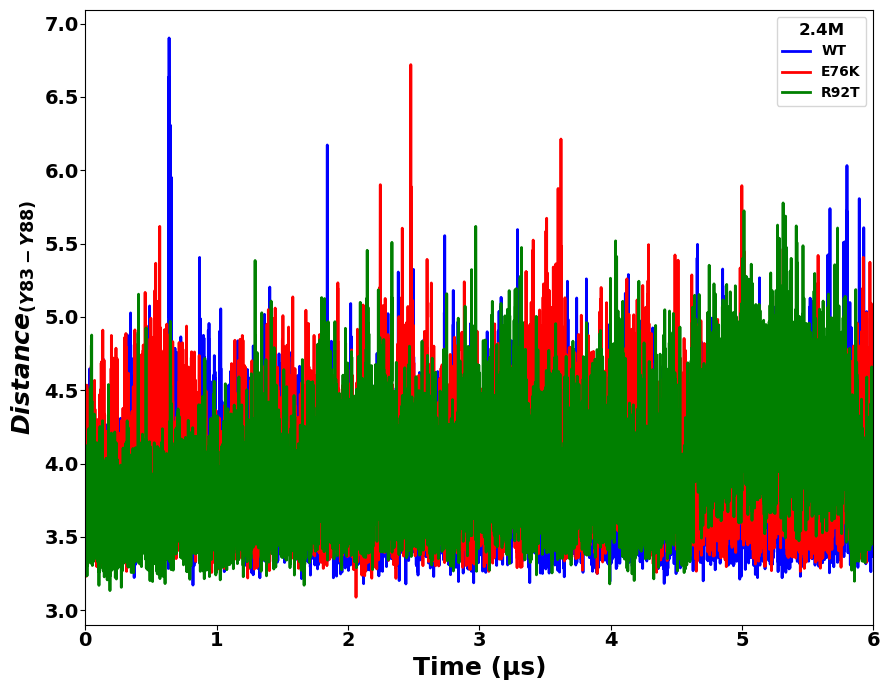

In [6]:
# plot of Distance between the phenolic rings of H2BY83 and H4Y88 against time for all systems at 6 𝝁s

plt.subplots(figsize=(9, 7))
x_val5 = [x[0]/4166.667 for x in Distance_YY]
y_val5 = [x[1] for x in Distance_YY]
x_val6 = [x[0]/4166.667 for x in Distance_YY2]
y_val6 = [x[1] for x in Distance_YY2]
x_val7 = [x[0]/4166.667 for x in Distance_YY3]
y_val7 = [x[1] for x in Distance_YY3]
plt.plot(x_val5, y_val5, lw=2, color='blue', label='WT')
plt.plot(x_val6, y_val6, lw=2, color='r', label='E76K')
plt.plot(x_val7, y_val7, lw=2, color='g', label='R92T')
plt.xlim([0, 6])
#plt.title("Distance between Aromatic Rings \n of Y83 and Y88 over time", weight="bold")
plt.xlabel("Time (\u03BCs)", fontsize = 18.0, fontweight="bold")
plt.ylabel(r"$\bf{\it{Distance_{(Y83-Y88)}}}$", fontsize = 18.0, fontweight="bold")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.tick_params(labelsize=14, pad=1)
plt.tight_layout()
plt.legend(loc='upper right', fontsize='large', title='2.4M', title_fontsize='large', prop={'weight':'bold'})
plt.show()


In [15]:
# Calculate mean and standard deviation of distances
# Enter raw data
D1=pd.read_csv('Distances/Dist_YY_1kx5_24M_6us.csv')
D2=pd.read_csv('Distances/Dist_YY_E76K_24M_6us.csv')
D3=pd.read_csv('Distances/Dist_YY_R92T_24M_6us.csv')
# Calculate the average
D1_mean = np.mean(D1['1'])
D2_mean = np.mean(D2['1'])
D3_mean = np.mean(D3['1'])
# Calculate the standard deviation
D1_std = np.std(D1['1'])
D2_std = np.std(D2['1'])
D3_std = np.std(D3['1'])
D1_std
# Create lists for the plot
Nucleosome_Systems = ['1KX5', 'E76K', 'R92T']
x_pos = np.arange(len(Nucleosome_Systems))
Dihed = [D1_mean, D2_mean, D3_mean]
error = [D1_std, D2_std, D3_std]

In [16]:
## Block averaging
D1=pd.read_csv('Dist_YY_1kx5_24M_6us.csv')
D1=D1['1']
D1=D1.to_numpy()
reblock_data = pyblock.blocking.reblock(D1)
# for reblock_iter in reblock_data:
#     print(reblock_iter)
opt = pyblock.blocking.find_optimal_block(len(D1), reblock_data)
print(opt)
print(reblock_data[opt[0]])

print("..........................................................................................................")
D2=pd.read_csv('Dist_YY_E76K_24M_6us.csv')
D2=D2['1']
D2=D2.to_numpy()
reblock_data = pyblock.blocking.reblock(D2)
for reblock_iter in reblock_data:
    print(reblock_iter)
# opt = pyblock.blocking.find_optimal_block(len(D2), reblock_data)
# print(opt)
# print(reblock_data[opt[0]])

print("..........................................................................................................")
D3=pd.read_csv('Dist_YY_R92T_24M_6us.csv')
D3=D3['1']
D3=D3.to_numpy()
reblock_data = pyblock.blocking.reblock(D3)
for reblock_iter in reblock_data:
    print(reblock_iter)
# opt = pyblock.blocking.find_optimal_block(len(D3), reblock_data)
# print(opt)
# print(reblock_data[opt[0]])


[10]
BlockTuple(block=10, ndata=24, mean=array(3.80877223), cov=array(0.00812648), std_err=array(0.01840117), std_err_err=array(0.0027131))
..........................................................................................................
BlockTuple(block=0, ndata=25000, mean=array(3.93444041), cov=array(0.11353456), std_err=array(0.00213105), std_err_err=array(9.53054449e-06))
BlockTuple(block=1, ndata=12500, mean=array(3.93444041), cov=array(0.0842357), std_err=array(0.00259593), std_err_err=array(1.64187634e-05))
BlockTuple(block=2, ndata=6250, mean=array(3.93444041), cov=array(0.06644408), std_err=array(0.00326053), std_err_err=array(2.91653957e-05))
BlockTuple(block=3, ndata=3125, mean=array(3.93444041), cov=array(0.05553185), std_err=array(0.00421547), std_err_err=array(5.33304856e-05))
BlockTuple(block=4, ndata=1562, mean=array(3.93434414), cov=array(0.04696128), std_err=array(0.00548314), std_err_err=array(9.81325288e-05))
BlockTuple(block=5, ndata=781, mean=array(3.934

In [12]:
# Create lists for the plot
Nucleosome_Systems = ['WT', 'E76K', 'R92T']
x_pos = np.arange(len(Nucleosome_Systems))
Dihed = [3.80877223, 3.93090993, 3.92682522]
error = [0.01840117, 0.02257231, 0.04193882]

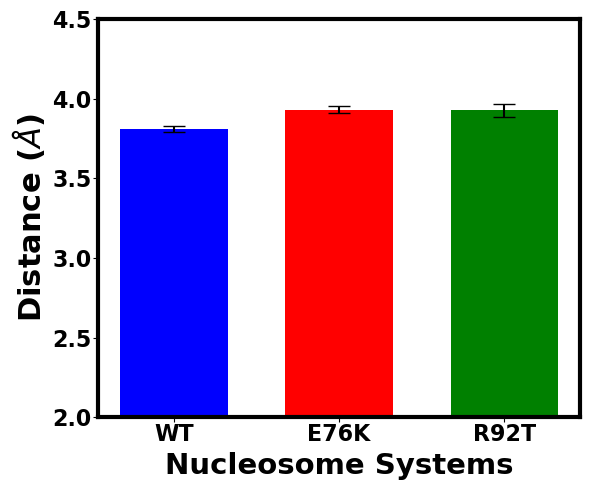

In [13]:
# Bar-plot of average Distance between H2BY83 and H4Y88 for all systems
fig, ax = plt.subplots(figsize=(6, 5))
plt.ylim(2,4.5)
colors=['blue', 'red', 'green']
ax.bar(x_pos, Dihed, yerr=error, align='center', ecolor='black', color=colors, capsize=8, width=0.65)
ax.set_ylabel(r"Distance ($\AA$)", fontsize = 22.0, fontweight="bold")
ax.set_xlabel('Nucleosome Systems', fontsize = 21.0, fontweight="bold")
ax.set_xticks(x_pos)
ax.set_xticklabels(Nucleosome_Systems, weight='bold', fontsize = 16.0)
ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
plt.tick_params(labelsize=16, pad=1)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# Save the figure and show
plt.tight_layout()
plt.savefig('Distances/Dist_YY_24M_edited.svg',format='svg', dpi=600,transparent=False)
plt.show()

/tmp/ipykernel_55494/1334068220.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), weight='bold')


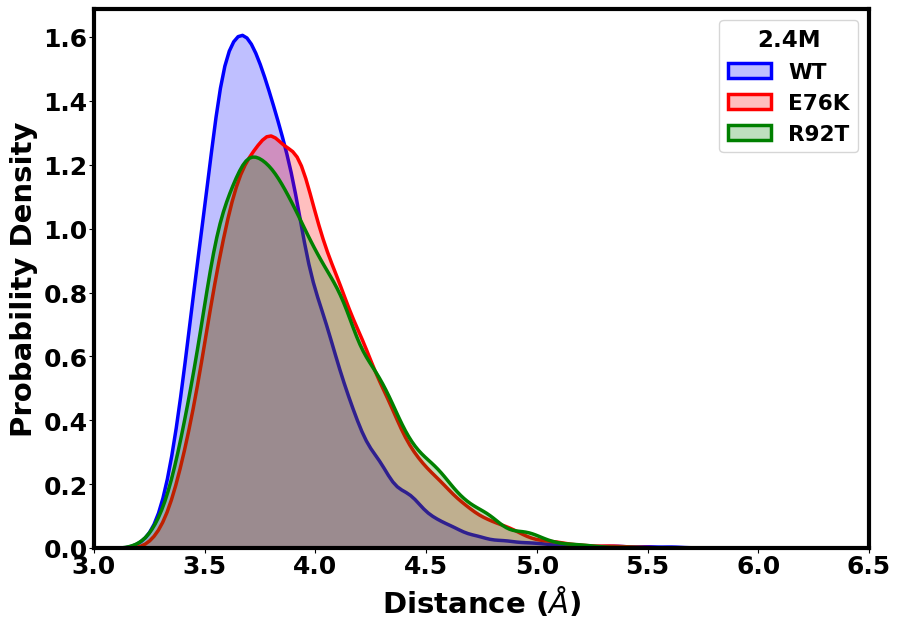

In [14]:
### Probability Distribution of the Distances between H2BY83 and H4Y88 of all systems
fig, ax = plt.subplots(figsize=(10, 7))
sns.kdeplot(data=D1, color='blue',fill=True, linewidth=2.5, legend=True, label='WT')
sns.kdeplot(data=D2, color='red',fill=True, linewidth=2.5, legend=True, label='E76K')
sns.kdeplot(data=D3, color='green',fill=True, linewidth=2.5, legend=True, label='R92T')
plt.tick_params(labelsize=18, pad=1)
#ax.set_yticklabels(ax.get_yticks(), weight='bold')
ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
plt.xlim([3,6.5])
ax.set_xticklabels(ax.get_xticks(), weight='bold')
plt.xlabel('Distance ($\AA$)', fontsize = 21.0, fontweight="bold")
plt.ylabel('Probability Density', fontsize = 21.0, fontweight="bold")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.legend(loc='upper right', fontsize=15.5, title='2.4M', title_fontsize=16.5)
# plt.savefig('Distances/Dist_YY2_24M_edited.svg',format='svg', dpi=600,transparent=False)
plt.show()

In [29]:
## Block averaging
D1=pd.read_csv('Dist_YY_1kx5_24M_6us.csv')
D1a=D1['2']
D1a=D1a.to_numpy()
reblock_data = pyblock.blocking.reblock(D1a)
for reblock_iter in reblock_data:
    print(reblock_iter)
opt = pyblock.blocking.find_optimal_block(len(D1a), reblock_data)
# print(opt)
# print(reblock_data[opt[0]])

print("..........................................................................................................")
D2=pd.read_csv('Dist_YY_E76K_24M_6us.csv')
D2a=D2['2']
D2a=D2a.to_numpy()
reblock_data = pyblock.blocking.reblock(D2a)
for reblock_iter in reblock_data:
    print(reblock_iter)
opt = pyblock.blocking.find_optimal_block(len(D2a), reblock_data)
#print(opt)
#print(reblock_data[opt[0]])

print("..........................................................................................................")
D3=pd.read_csv('Dist_YY_R92T_24M_6us.csv')
D3a=D3['2']
D3a=D3a.to_numpy()
reblock_data = pyblock.blocking.reblock(D3a)
for reblock_iter in reblock_data:
    print(reblock_iter)
opt = pyblock.blocking.find_optimal_block(len(D3a), reblock_data)
# print(opt)
# print(reblock_data[opt[0]])

BlockTuple(block=0, ndata=25000, mean=array(1.9872968), cov=array(1.62923737), std_err=array(0.00807276), std_err_err=array(3.61032136e-05))
BlockTuple(block=1, ndata=12500, mean=array(1.9872968), cov=array(1.62078507), std_err=array(0.01138696), std_err_err=array(7.20203248e-05))
BlockTuple(block=2, ndata=6250, mean=array(1.9872968), cov=array(1.61617597), std_err=array(0.01608068), std_err_err=array(0.00014384))
BlockTuple(block=3, ndata=3125, mean=array(1.9872968), cov=array(1.6132386), std_err=array(0.02272084), std_err_err=array(0.00028744))
BlockTuple(block=4, ndata=1562, mean=array(1.98697499), cov=array(1.61104639), std_err=array(0.03211541), std_err_err=array(0.00057477))
BlockTuple(block=5, ndata=781, mean=array(1.98697499), cov=array(1.60887002), std_err=array(0.04538736), std_err_err=array(0.00114914))
BlockTuple(block=6, ndata=390, mean=array(1.98576774), cov=array(1.61013521), std_err=array(0.06425381), std_err_err=array(0.00230361))
BlockTuple(block=7, ndata=195, mean=ar

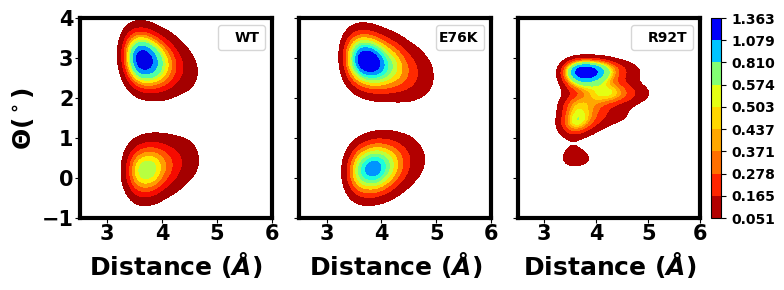

In [13]:
#Distance versus Angle between Aromatic Rings
D1=pd.read_csv('Distances/Dist_YY_1kx5_24M_6us.csv')
D2=pd.read_csv('Distances/Dist_YY_E76K_24M_6us.csv')
D3=pd.read_csv('Distances/Dist_YY_R92T_24M_6us.csv')
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(8, 3), gridspec_kw={'width_ratios': [2.2, 2.2, 2.6]})
s1=sns.kdeplot(ax=axes[0], x=D1['1'], y=D1['2'], cmap="jet_r", fill=True, bw_adjust=1.5, legend=True, label='WT', cbar_ax=0.5 , common_norm=True)
plt.ylim([-1, 4])
plt.yticks([-1,0,1,2,3,4])
plt.xlim([2.5, 6])
s1.set_ylabel(r"${\Theta}$($^\circ$)", fontsize = 18.0)
s1.set_xlabel("Distance ($\AA$)", fontsize = 18.0)
s1.legend(handlelength=0.0)
s1.tick_params(labelsize=15, pad=1)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

s2=sns.kdeplot(ax=axes[1], x=D2['1'], y=D2['2'], cmap="jet_r", fill=True, bw_adjust=1.5, legend=True, label='E76K', cbar_ax=0.5, common_norm=True,)
plt.ylim([-1, 4])
plt.xlim([2.5, 6])
s2.set_xlabel("Distance ($\AA$)", fontsize = 18.0)
s2.legend(handlelength=-1.0)
s2.tick_params(labelsize=15, pad=1)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

s3=sns.kdeplot(ax=axes[2], x=D3['1'], y=D3['2'], cmap="jet_r", fill=True, bw_adjust=1.5, legend=True, label='R92T', common_norm=True, cbar=True)
plt.ylim([-1, 4])
plt.xlim([2.5,6])
s3.set_xlabel("Distance ($\AA$)", fontsize = 18.0)
s3.legend(handlelength=0.0)
s3.tick_params(labelsize=15, pad=1)
plt.xticks([3,4,5,6])
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
s1.spines["top"].set_linewidth(3)
s1.spines["left"].set_linewidth(3)
s1.spines["right"].set_linewidth(3)
s1.spines["bottom"].set_linewidth(3)
s2.spines["top"].set_linewidth(3)
s2.spines["left"].set_linewidth(3)
s2.spines["right"].set_linewidth(3)
s2.spines["bottom"].set_linewidth(3)
s3.spines["top"].set_linewidth(3)
s3.spines["left"].set_linewidth(3)
s3.spines["right"].set_linewidth(3)
s3.spines["bottom"].set_linewidth(3)
plt.tight_layout()
plt.show()